In [1171]:
import math
import numpy as np
import pandas as pd
import random
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from matplotlib.animation import FuncAnimation
import time
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Why Gradient Descent?

Trong ML, ta thường xuyên phải tìm **Giá trị nhỏ nhất của một hàm số** nào đó.VD như  trong 2 bài toán Linear Regression và K-means Clustering, ta phải tìm **global minimum** của các **hàm mất mát**.

<span style="color:red">&#10060;</span> Điều này là **Phức tạp, thậm chí bất khả thi**.

👉 Thay vào đó, tìm các điểm **Local minimum**, ở một mức độ nào đó, coi đó là nghiệm của bài toán

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Extrema_example_original.svg/1280px-Extrema_example_original.svg.png' style="width:500px;"/>

👉 Để tìm local minimum => **giải phương trình đạo hàm =0**, tìm đc toàn bộ (hữu hạn) các điểm cực tiêu, thay vào hàm số rồi tìm điểm làm cho hàm có giá trị nhỏ nhất.

<span style="color:red">&#10060;</span> **Điều này cũng bất khả thi** do phương trình đạo hàm quá phức tạp (do số chuyền lớn, quá nhiều điểm dữ liệu)

<span style="color: green; font-size: 24px;">&#10004;</span> **Gradient Descent** được sử dụng với ý tưởng:

👉 Xuất phát từ 1 điểm mà ta **coi là gần** với nghiệm bài toàn

👉 Sử dụng phép toán lặp để tiến dần đến điểm cần tìm, tức đến khi đạo hàm gần 0.



# Gradient Descent cho hàm 1 biến

<img src='https://github.com/tiepvupsu/tiepvupsu.github.io/blob/master/assets/GD/gradient_descent.png?raw=true' style="width:500px;"/>

Giả sử:
* $x_t$ là điểm ta tìm được sau vòng lặp thứ t
* $x^*$ là điểm local minimum (là điểm có $f'(x^*)=0$

👉 Với mỗi $x_t$ ta phải di chuyển một khoảng Δ **ngược dấu** với đạo hàm $f'(x_t)$ để tiến gần đến $x^*$:
<div style="margin-left: 200px;"> $x_{t+1} = x_t + Δ $</div>


👉 $x_t$ càng xa $x^*$ về bên phải thì $f'(x_t)$ càng lớn hơn 0 (và ngược lại) => Lượng Δ trức quan nhất là tỉ lệ thuận với $-f'(x_t)$

<div style="margin-left: 200px;"> $x_{t+1} = x_t - \eta f'(x_t)$

Trong đó $\eta$ (eta) là một số **dương** được gọi là **learning rate** (tốc độ học), dấu $-$ thể hiện việc ta phải đi **ngược dấu với đạo hàm** (Gradient Descent)

<font size =5> &#x1F4DA; : Tìm nghiệm bài toán $f(x) = x^2 + 5sin(x)$

In [841]:
def f(x):
    return x*x + 5*np.sin(x)

👉 $f'(x) = 2x + 5cos(x) $


In [842]:
def grad(x):
    return 2*x + 5*np.cos(x)

⚠️ KIỂM TRA ĐẠO HÀM (do việc đạo hàm rất dễ sai)



<span style="color: green; font-size: 24px;">&#10004;</span> Sử dụng công thức xấp xỉ hai phía:
<div style="margin-left: 200px;"><font size =5> $f'(x) ≈ \frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon} $
   

**Tại sao sử dụng công thức này mà không sử dụng công thức xấp xỉ đạo hàm trái hoặc xấp xỉ đạo hàm phải?**

<img src='https://machinelearningcoban.com/assets/GD/check_grad.png' style="width:700px;"/>

In [651]:
grad(0.5), (f(0.5+1e-6)-f(0.5-1e-6))/2e-6

(5.387912809451864, 5.387912809684536)

👉 Gradient Descent

In [844]:
def GD1(eta,x0):
    x_t = x0
    x = [0]*100
    for i in range(100):
        x_t = x_t - eta*grad(x_t)
        if(abs(grad(x_t))< 1e-3):
            break
        x.insert(i,x_t)
    return x_t,i,x

In [2221]:
(x1, it1,a) = GD1(.01,-5)
(x2, it2,b) = GD1(.1,-5)
(x3, it3,c) = GD1(.5,-5)
(x4, it4,d) = GD1(.1,5)

👉 Display

In [482]:
def clear(i):
    for it_i,x_i,ax_i in it:
        if i < it_i: ax_i.clear()

In [488]:
def plot_f(i):
    for it_i,x_i,ax_i in it:
        if i<it_i: ax_i.plot(x,f(np.array(x)))

In [839]:
def line(i):
    if i>0:
        for it_i,x_i,ax_i in it:
            if i<it_i: 
                ax_i.plot((x_i[i],x_i[i-1]),(f(x_i[i]),f(x_i[i-1])),color='red')
                ax_i.scatter(x_i[i-1],f(x_i[i-1]),color='black')

In [489]:
def point(i):
    for it_i,x_i,ax_i in it:
        if i<it_i: ax_i.scatter(x_i[i],f(x_i[i]),color='red')


In [807]:
def set_label(i):
    for it_i,x_i,ax_i in it:
        if i<it_i:ax_i.set(xlabel=f'iter: {i+1}/{it_i}, $x_i$ = {x_i[i]:.5f}')
            

<IPython.core.display.Javascript object>


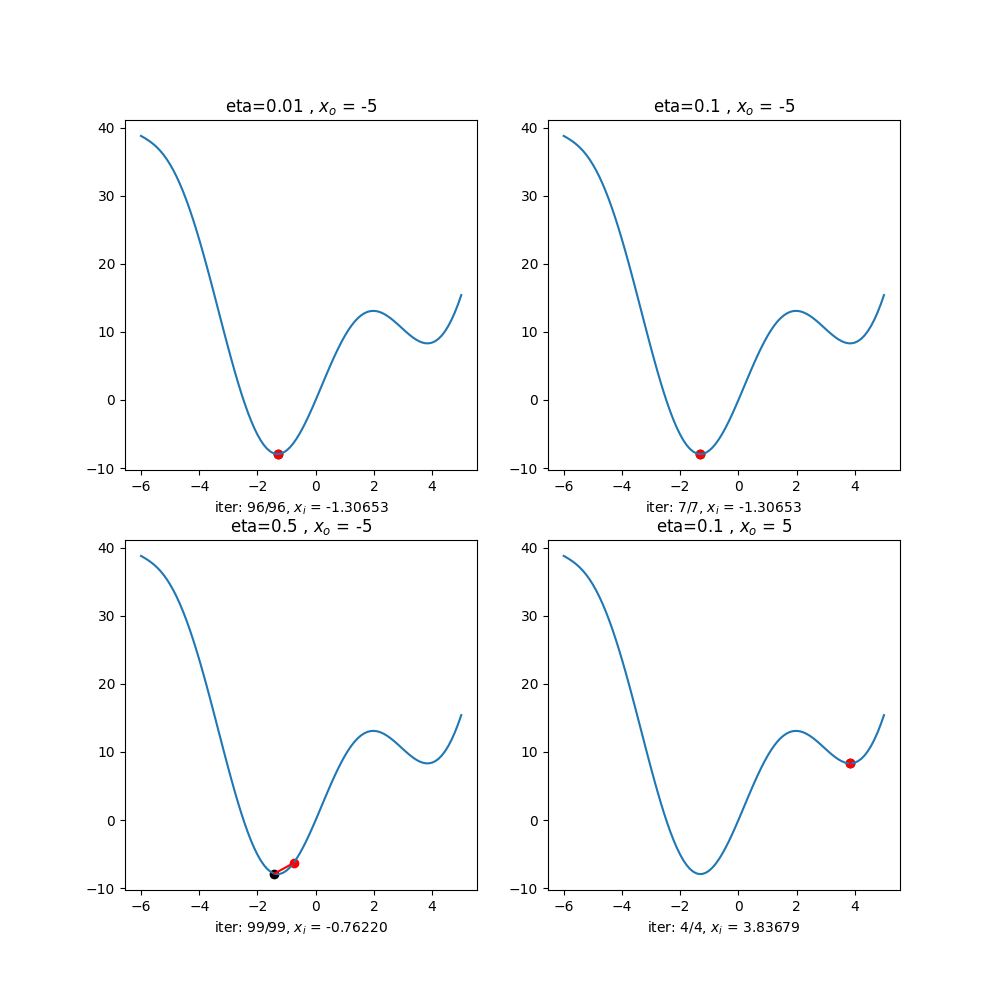

In [2223]:
x = np.linspace(-6,5,100)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
it = [(it1,a,ax1),(it2,b,ax2),(it3,c,ax3),(it4,d,ax4)]

for i in range(100):
    clear(i)
    plot_f(i)
    line(i)
    point(i)
    set_label(i)
    ax1.set(title='eta=0.01 , $x_o$ = -5')
    ax2.set(title='eta=0.1 , $x_o$ = -5')
    ax3.set(title='eta=0.5 , $x_o$ = -5')
    ax4.set(title='eta=0.1 , $x_o$ = 5')
    
    fig.canvas.draw()
    #time.sleep(0.1)

# Cho hàm nhiều biến

👉 Tương tự như hàm **một biến** nhưng thay thành **nhiều biến**
<div style="margin-left: 200px;">$ x$ &#8594 $\theta $ : là một vector dùng để kí hiệu tập hợp các tham số
    
$f'$ &#8594; $\nabla_{\theta} f$ : đạo hàm của hàm số tại 1 điểm $\theta$ bất kỳ (nabla theta)

👉 $\theta_{t+1} = \theta_t - \eta \nabla_{\theta}$ f$(\theta_t)$

## &#x1F4C8; Apply Linear Regression

<div style="margin-left: 200px;"> <font size=5> $\bar{y} = wx_i + w_0$

👉 Hàm(Hàm mất mát):

<div style="margin-left: 200px;"> <font size=5> $L(w) = \frac{1}{N}\sum_{i =1}^N(y_i - \bar{y_i})^2 $ $ = \frac{1}{N}\sum_{i =1}^N(y_i - (wx_i + w_0))^2 $

* N là số lượng dl
* $\bar{X_i}$ là các hàng chứa giá trị của df['sqft_living'] (x_train)
* $y_i$ là là các hàng chứa giá trị của df['price'] (y_train)

In [1457]:
def f_L(X,Y,w0,w):
    return (1/N)*np.sum((Y-(w*X+w0))**2)

👉 Đạo hàm $L(w)$ theo w:
<div style="margin-left: 200px;"><font size =5> $f'_w = \frac{-2}{N} \sum (y_i - (wx_i+w_0)).x_i =\frac{-2}{N} \sum x_i(y_i - \bar{y_i}) $

In [2096]:
def grad_L_w(X,Y,Y_pred):
    return (-2/N)*np.sum((Y -Y_pred)*X)

👉 Đạo hàm $L(w)$ theo w0:
<div style="margin-left: 200px;"><font size =5> $f'_{w_0} = \frac{-2}{N} \sum (y_i - (wx_i + w_0)) = \frac{-2}{N} \sum (y_i - \bar{y_i}) $


In [2097]:
def grad_L_b(X,Y,Y_pred):
    return (-2/N)*np.sum((Y -Y_pred))

<font size =5>  🏠 House data

In [1498]:
def GD(X,y,eta,epochs,w0,w):
    w_0_t = w
    w_t = w0
    a_0 = [w]
    a_1 = [w0]
    for i in range (epochs):
        Y_pred = w_0_t + w_t*X
        w_0_t = w_0_t - eta*grad_L_b(X,y,Y_pred)
        w_t = w_t - eta*grad_L_w(X,y,Y_pred)
        #print(f'grad_0:{grad_L_b(Y_pred)}, grad:{grad_L_w(Y_pred)}')
        a_0.append(w_0_t)
        a_1.append(w_t)
        if (abs(grad_L_b(X,y,Y_pred))< 1e-12)&(abs(grad_L_w(X,y,Y_pred))< 1e-12):
            break
    return a_0,a_1

In [2224]:
df = pd.read_csv("kc_house_data.csv")
#df = df_house.sample(100)
X = df['sqft_living']
Y = df['price']

N = len(X)
(a_0,a_1) = GD(X,Y,.00000001,200,-10,-10)

In [2125]:
len(a_1)

201

<font size = 4> ⚠️ **Exploding Gradient**

<IPython.core.display.Javascript object>


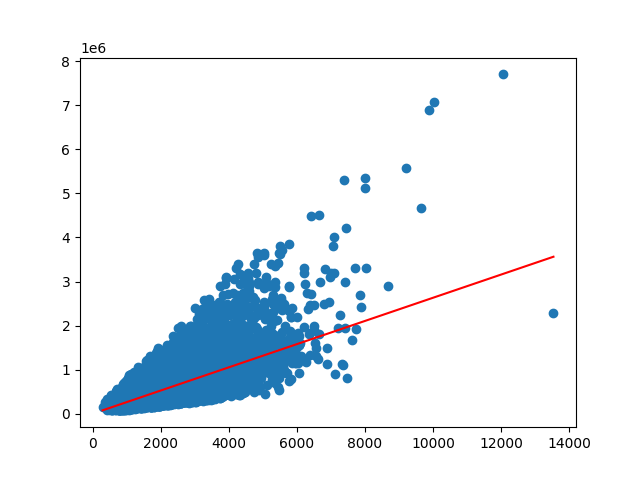

In [2225]:
fig = plt.figure()
ax_ = fig.add_subplot(111)
for i in range(200):
    ax_.clear()
    ax_.scatter(X,Y)
    ax_.plot([min(X),max(X)],[(a_0[i]+a_1[i]*min(X)),(a_0[i]+a_1[i]*max(X))],color='r')    
    #ax_.set(xlim=(0,8),ylim=(0,5),title=f'iter: {i+1}/100')
    fig.canvas.draw()
    
    #time.sleep(0.5)

<IPython.core.display.Javascript object>


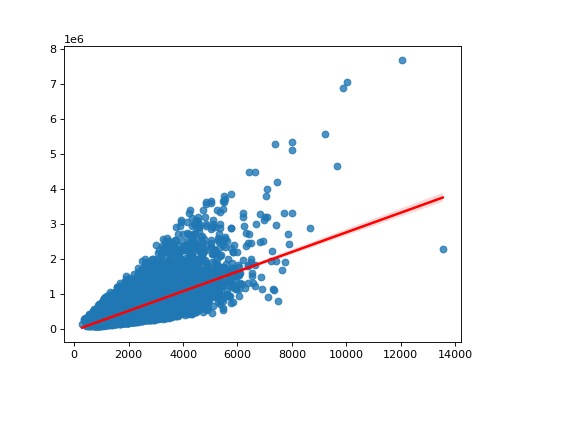

In [1294]:
fg,ax = plt.subplots()
sns.regplot(x=X,y=Y,line_kws={'color':'red'},scatter=True);

<font size = 5> 🌺 Iris

In [2226]:
iris = sns.load_dataset("iris")
X = iris['petal_length']
Y = iris['petal_width']

In [1233]:
len(X_iris)

150

In [2227]:
(a_0,a_1) = GD(X,Y,.01,5000,1,-0.4)

In [1507]:
a_0


[-0.4,
 -0.401498172396243,
 -0.4029773471070238,
 -0.40443776210195626,
 -0.4058796523701337,
 -0.40730324995745965,
 -0.40870878400351046,
 -0.41009648077793637,
 -0.4114665637164068,
 -0.4128192534561052,
 -0.41415476787077976,
 -0.4154733221053545,
 -0.41677512861010735,
 -0.41806039717442,
 -0.419329334960105,
 -0.4205821465343155,
 -0.42181903390204284,
 -0.42304019653820696,
 -0.424245831419345,
 -0.4254361330549032,
 -0.4266112935181363,
 -0.4277715024766207,
 -0.42891694722238477,
 -0.43004781270166215,
 -0.43116428154427233,
 -0.43226653409263327,
 -0.43335474843041044,
 -0.43442910041080746,
 -0.4354897636845019,
 -0.43653690972723147,
 -0.4375707078670349,
 -0.438591325311151,
 -0.43959892717258164,
 -0.44059367649632125,
 -0.44157573428525837,
 -0.44254525952575247,
 -0.44350240921289064,
 -0.4444473383754277,
 -0.4453802001004142,
 -0.44630114555751577,
 -0.44721032402302796,
 -0.4481078829035904,
 -0.4489939677596035,
 -0.44986872232835257,
 -0.4507322885468418,
 -0.4515

<IPython.core.display.Javascript object>


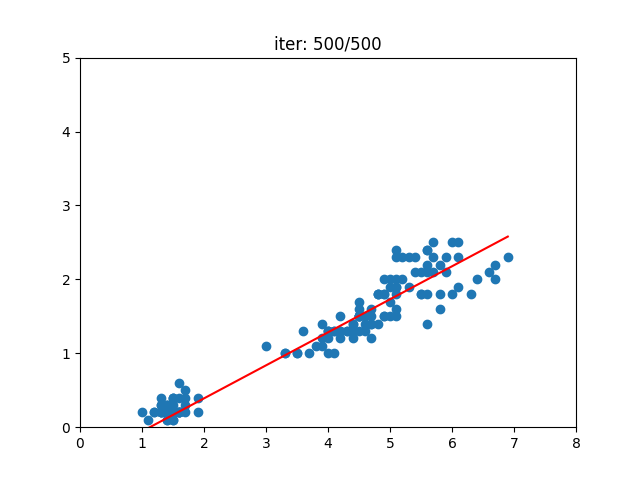

In [2228]:
fig = plt.figure()
ax_ = fig.add_subplot(111)

for i in range(500):
    ax_.clear()
    ax_.plot([min(X_iris),max(X_iris)],[(a_0[10*i]+a_1[10*i]*min(X_iris)),(a_0[10*i]+a_1[10*i]*max(X_iris))],color='r')
    ax_.scatter(X_iris,Y_iris)
    ax_.set(xlim=(0,8),ylim=(0,5),title=f'iter: {i+1}/500')
    fig.canvas.draw()
    #time.sleep(0.1)

<IPython.core.display.Javascript object>


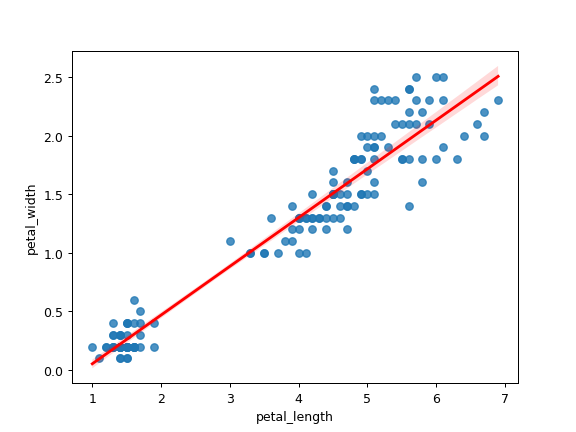

In [1497]:
fg,ax = plt.subplots()
sns.regplot(x=X_iris,y=Y_iris,line_kws={'color':'red'},scatter=True);

# Nhược điểm

<span style="color:red">&#10060;</span>  **Dễ rơi vào local minimum**

<span style="color:red">&#10060;</span> Không thích hợp cho hàm mất mát không liên tục, đạo hàm không xác định

⚠️ Một số hiện tượng không mong muốn xảy ra:

* **Vanishing Gradient**: Đạo hàm rất nhỏ, việc học trở nên kém hiệu quả, gần như không học dc gì
* **Exploding Gradient**: Ngược lại, khi đạo hàm là rất lớn, dẫn đến không thể hội tụ tịa điểm minimum
* **Saddle Point**: Khi nhìn ở một góc độ thì có thể đó làm điểm cần tìm, nhưng khi nhìn góc độ khác thì điểm tìm ra không đúng

<img src='https://www.encora.com/hubfs/Problems%20with%20Gradient%20Descent%20Picture3-png.png' style="width:700px;"/>

# Biến thể và các thuật toán tối ưu GD

## Momemtum (Tối ưu)

### Ý tưởng

<img src='https://scontent-hkg4-1.xx.fbcdn.net/v/t1.15752-9/395708563_633297015669072_5219528985871011975_n.png?_nc_cat=101&ccb=1-7&_nc_sid=8cd0a2&_nc_ohc=xoEvyLMPwS0AX92wU4C&_nc_ht=scontent-hkg4-1.xx&oh=03_AdT4VhCfjsigayjrx88UiNubjQ824TT-eRvuOlJRzxydsw&oe=65614079' style="width:600px;"/>

<div style="margin-left: 250px;"><font size =5>   Idea from the pespective of Physics

<span style="color:red">&#10060;</span> Hình b: với điểm đầu đặt tại B, theo thuật toán GD, quả bi sẽ dừng lại (hội tụ) tại điểm D (là **local minimum**) như thế sẽ không tìm được điểm tối ưu của bài toán

&#128161; Lợi dụng vật lý, làm cho quả bi sẽ không dừng lại tại D mà *theo đà* chạy tiếp đến E.

<span style="color: green; font-size: 24px;">&#10004;</span>  Nghĩa là, với **vân tốc ban đầu** đủ lớn, quả bi có thể lăn đến E rồi rơi xuống C

### Apply

vị trí của hòn bi: 

<div style="margin-left: 200px;"><font size =5> $\theta_{t+1} =\theta_t - v_t $

TRONG ĐÓ, $v_t$ thể hiện cả về **độ dốc** của mặt phằng(**đạo hàm**), lẫn **đà** (**vận tốc cũ**) của hòn bi:

<div style="margin-left: 200px;"><font size =5> $v_t = \gamma v_{t-1} + \eta \nabla_{\theta}f(\theta)$

* $\gamma$ thể hiện sự ảnh hưởng của vẫn tốc cũ (hiểu đơn giản là nghịch đảo của hệ số ma sát theo VL), thường lấy 0.9

* $v_{t-1}$ là vận tốc tại thời điểm trước đó 
* $\nabla_{\theta}f(\theta)$ là độ dốc của điểm trước đó

<font size =5> &#x1F4DA; : Tìm nghiệm bài toán $f(x) = x^2 + 10sin(x)$

In [2231]:
def f(x):
    return x**2 + 10*np.sin(x)

$\rightarrow f'(x) = 2x + 10cos(x) $ 

In [2232]:
def grad(x):
    return 2*x + 10*np.cos(x)

In [2233]:
def GD_momentum(eta,gamma,x0,epochs):
    x = [x0]
    v_t = 0
    for i in range (1,epochs):
        if abs(grad(x[-1])) < 1e-6:
            break
        v_t = gamma*v_t + eta*grad(x[-1])
        x_t = x[-1] - v_t
        x.append(x_t)
    return (x,i)

In [2234]:
a,it_ = GD_momentum(0.1,0.9,5,1000)
x_,it1,b = GD1(0.1,5)

<IPython.core.display.Javascript object>


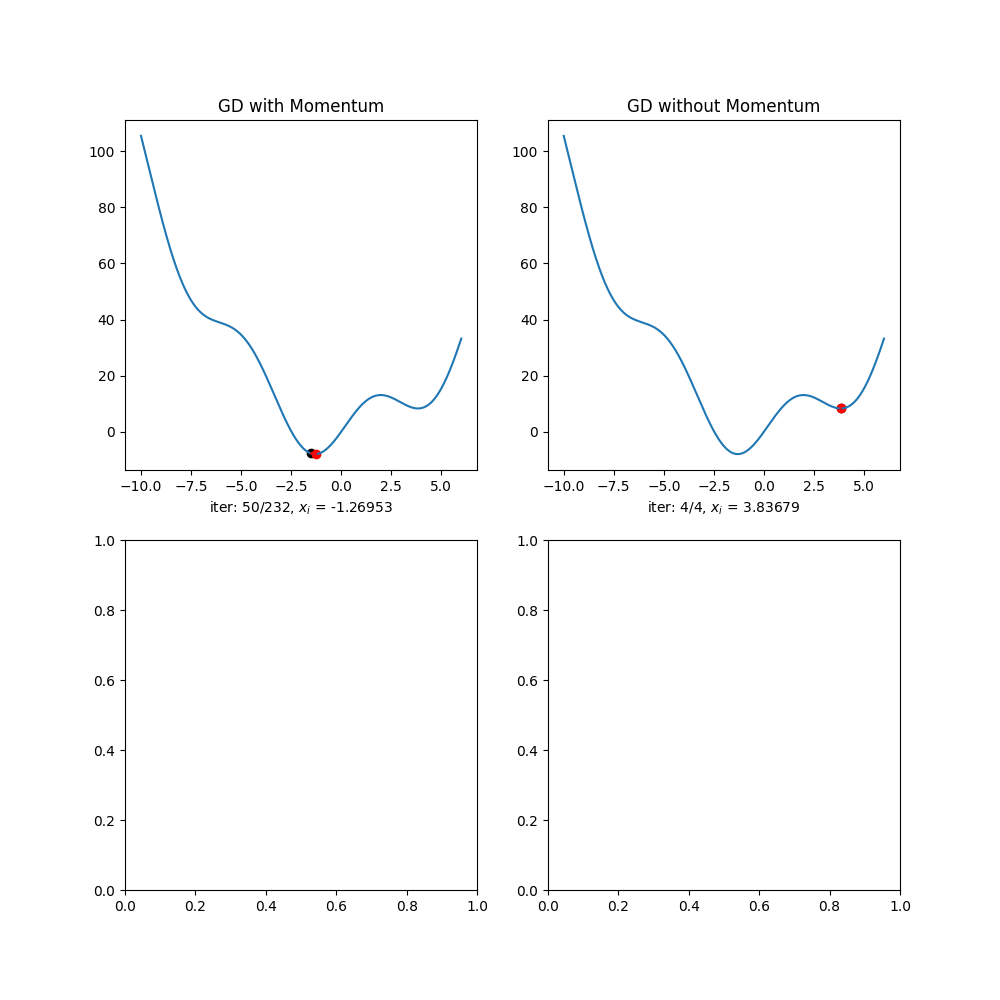

In [2235]:
x = np.linspace(-10,6,1000)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
it = [(it_,a,ax1),(it1,b,ax2)]
for i in range(50):
    clear(i)
    ax1.set(title='GD with Momentum')
    ax2.set(title='GD without Momentum')
    plot_f(i)
    line(i)
    point(i)
    set_label(i)
    fig.canvas.draw()
   # time.sleep(0.5)

<font size = 5> <span style="color:red">&#10060;</span> : Ta thấy rõ 1 hạn chế rằng, khi gần đến đích, momemtum vẫn **mất khá nhiều thời gian** trước khi dừng lại. đó chính là vì nó có đà. 
    
<font size = 5>Khắc phục: 👇
    

## Nesterov accelerated gradient (NAG) (Tối ưu)

### Ý tưởng

&#128161; Dự đoán hướng đi kế tiếp.

Cụ thể, nó sẽ sử dụng gradient của điểm xấp xỉ điểm tiếp theo:

<img src='https://miro.medium.com/v2/resize:fit:720/format:webp/1*6MEi74EMyPERHlAX-x2Slw.png' style="width:800px;"/>

<font size = 4> &#x1F9EE; :
    <img src='https://miro.medium.com/v2/resize:fit:640/format:webp/1*ewQ9mtcJW00Dgp0ZJFNKmg.png' style="width:500px;"/>

### Apply

<font size =5> &#x1F4DA; : Tìm nghiệm bài toán $f(x) = x^2 + 10sin(x)$

<font size = 4> $ x_{the-approximate-next} = x_{now} - \gamma v_{previous} $

In [2236]:
def GD_NAG(eta,gamma,x0,epochs):
    x = [x0]
    v_old = 0
    for i in range (1,epochs):
        if abs(grad(x[-1])) < 1e-6:
            break
        
        x_next = x[-1] - v_old
        v_t = gamma*v_old + eta*grad(x_next)
        x_t = x[-1] - v_t
        x.append(x_t)
        v_old = v_t
    return (x,i)

In [2237]:
a,it_a = GD_momentum(0.1,0.9,5,1000)
x_,it_b,b = GD1(0.1,5)
c,it_c = GD_NAG(0.1,0.9,5,1000)

<IPython.core.display.Javascript object>


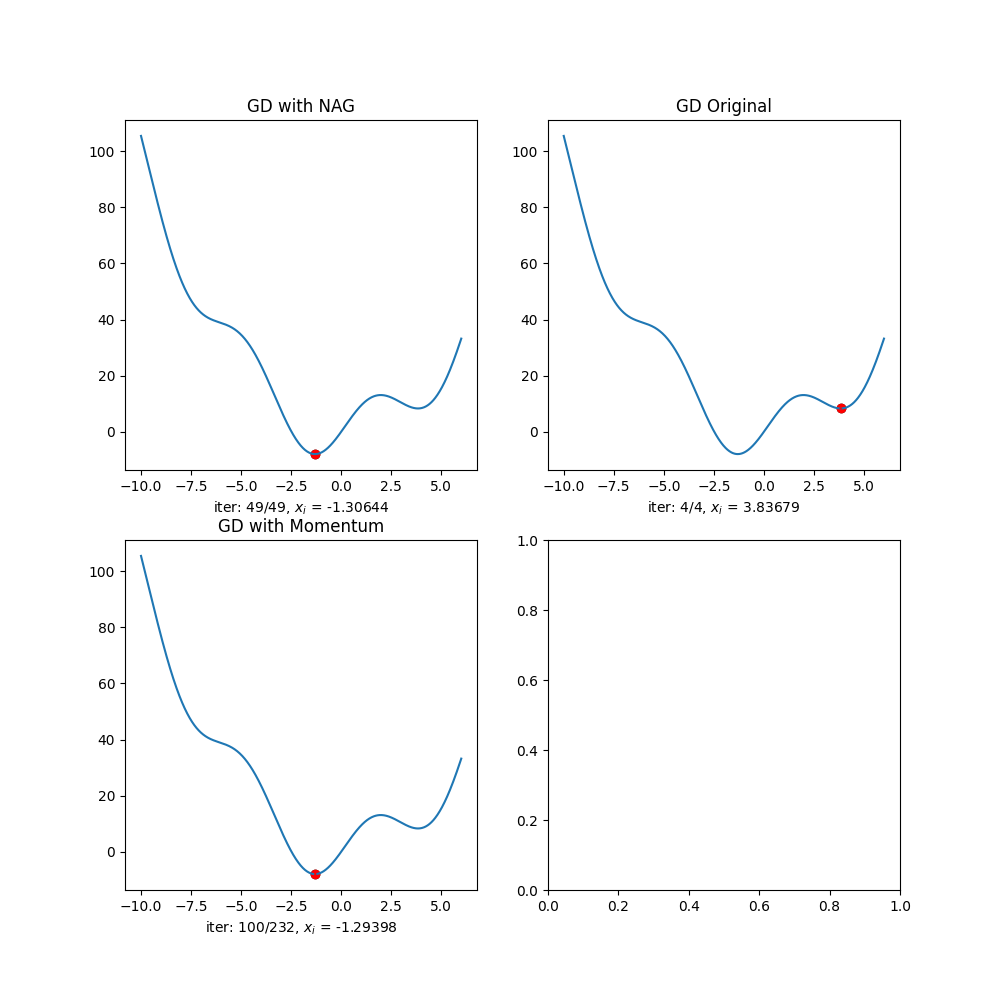

In [2238]:
x = np.linspace(-10,6,1000)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
it = [(it_c,c,ax1),(it_b,b,ax2),(it_a,a,ax3)]
for i in range(100):
    clear(i)
    ax1.set(title='GD with NAG')
    ax2.set(title='GD Original')
    ax3.set(title='GD with Momentum')
    plot_f(i)
    line(i)
    point(i)
    set_label(i)
    fig.canvas.draw()
    #time.sleep(0.5)

## Batch Gradient Descent

👉 là GD Original từ ban đầu, nó sử dụng tất cả các điểm dữ liệu $x_i$ trong việc thực hiện đạo hàm và tính toán...

<span style="color:red">&#10060;</span> Điều này là rất tồi tệ với csdl có rất nhiều điểm, khiến cho:
* Tính toán cồng kềnh và không hiệu quả
* Không áp dụng được với *online learning*

🔍 **Online learning**: là khi csdl được cập nhật liên tục theo thời gian. Kéo theo đó là mô hình phải thay đổi một chút để phù hợp với dữ liệu mới này

Vì vậy, khi áp dụng Batch Gradient Descent, việc tính lại đạo hàm của toàn bộ các điểm dữ liệu sẽ rất lâu, coi như là không online do mất quá nhiều thời gian tính toán.

<font size = 5> Khắc phục: 👇

## Stochastic Gradient Descent

* Với GD thông thường, mỗi epoch ứng với 1 lần cập nhật $\theta$ (nghiệm)

👉 Với SDG, mỗi epoch ứng với $N$ lần cập nhật $\theta$ với $N$ là số điểm dữ liệu.


👉 Sau mỗi epoch, ta cần trộn lại thứ tự của các điểm dữ liệu để đảm bảo tính ngẫu nhiên.

<font size =4> &#x1F9EE; Công thức : 

<div style="margin-left: 200px;"><font size = 4> $\theta = \theta  - \eta \nabla_{\theta}F(\theta;x_i;y_i)$

Trong đó: 
* F($\theta;x_i;y_i$) là hàm mất mát với chỉ 1 cặp điểm dữ liệu (input,label) là ($x_i,y_i$)

###  &#x1F4C8; Linear Regression
    

👉 Hàm SGD:

In [2136]:
def SGD(data,X,Y,eta,epochs,N,w,b):
    w_t = w
    b_t = b
    a_w = [w]
    a_b = [b]
    for i in range(epochs):
        sample_data = data.sample(N)
        x = sample_data[X].values
        y = sample_data[Y].values
        for k in range(N):
            y_pred = a_w[-1]*x[k] + a_b[-1]
            Lw = (-2/N) * x[k] * (y[k] - y_pred)
            Lb = (-2/N) * (y[k] - y_pred)
            w_t = w_t - eta * Lw
            b_t = b_t - eta * Lb
            a_w.append(w_t)
            a_b.append(b_t)
            if (abs(Lw)< 1e-12)&(abs(Lb)< 1e-12):
                break
    return a_w,a_b

In [2239]:
iris = sns.load_dataset("iris")
X = iris['petal_length']
Y = iris['petal_width']

(a_w,a_b) = SGD(iris,'petal_length','petal_width',0.01,400,5,-0.4,1)

<IPython.core.display.Javascript object>


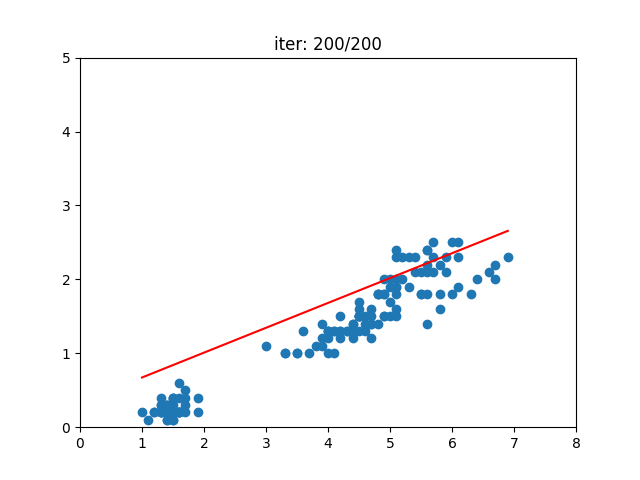

In [2240]:
fig = plt.figure()
ax_ = fig.add_subplot(111)

for i in range(200):
    ax_.clear()
    ax_.plot([min(X),max(X)],[(a_w[10*i]+a_w[10*i]*min(X)),(a_w[10*i]+a_w[10*i]*max(X))],color='r')
    ax_.scatter(X,Y)
    ax_.set(xlim=(0,8),ylim=(0,5),title=f'iter: {i+1}/200')
    fig.canvas.draw()
    #time.sleep(0.1)

In [2140]:
len(a_w)

2001

<IPython.core.display.Javascript object>


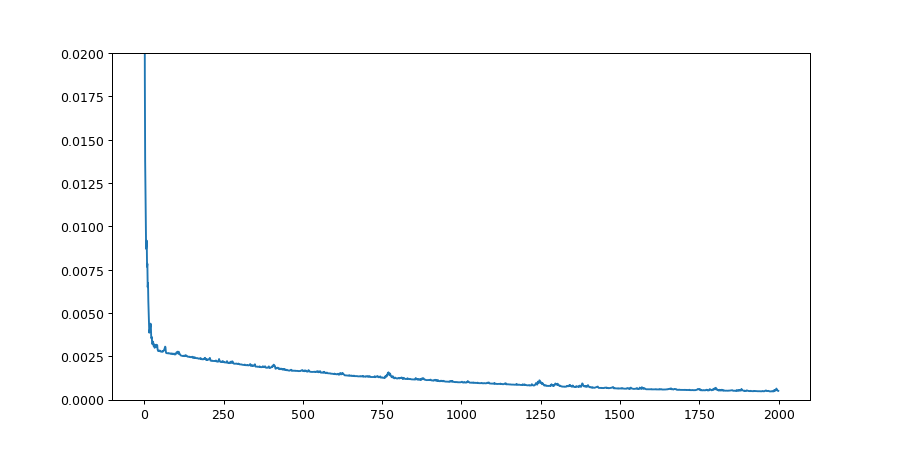

[(0.0, 0.02)]

In [2202]:
iris = sns.load_dataset("iris")
X = iris['petal_length']
Y = iris['petal_width']

(a_w,a_b) = SGD(iris,'petal_length','petal_width',0.01,400,5,-0.4,1)
f_SGD = []

fig,(ax) = plt.subplots(figsize = (10,5))
for i in range (2000):
    f_SGD.append(f_L(X,Y,a_b[i],a_w[i]))
    
ax.plot(f_SGD)
ax.set(ylim=(0,0.02))

<IPython.core.display.Javascript object>


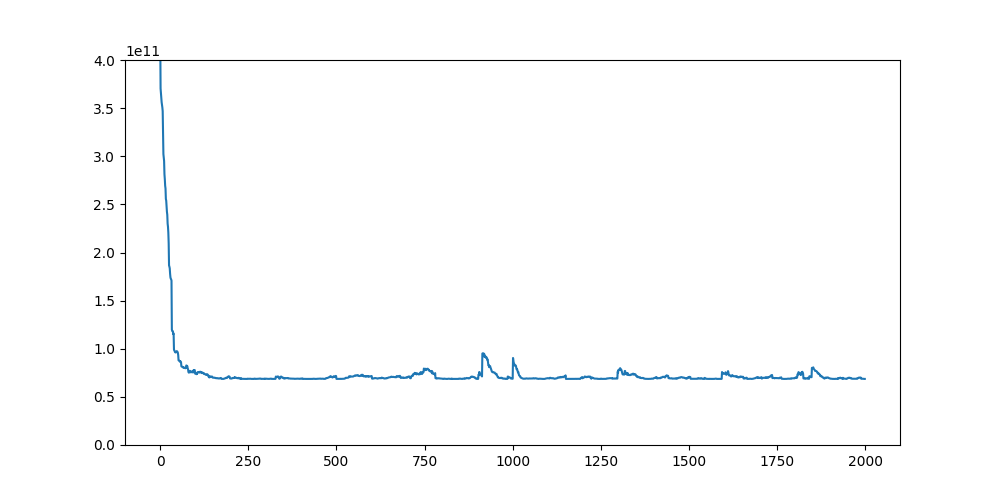

[(0.0, 400000000000.0)]

In [2241]:
df = pd.read_csv("kc_house_data.csv")
#df = df_house.sample(100)
X = df['sqft_living']
Y = df['price']

(a_w,a_b) = SGD(df,'sqft_living','price',0.00000001,400,5,0,0)

f_SGD = []

fig,(ax) = plt.subplots(figsize = (10,5))
for i in range (2000):
    f_SGD.append(f_L(X,Y,a_b[i],a_w[i]))
    
ax.plot(f_SGD)
ax.set(ylim=(0,4e11))

### Nhược điểm: 

<span style="color:red">&#10060;</span>  SGD thực hiện cập nhật thường xuyên với phương sai cao khiến hàm mục tiêu dao động mạnh (VD trên)


<span style="color:red">&#10060;</span> với hàm SGD, nó sẽ nhảy tới local minimum mới có khả năng tốt hơn, điều này dẫn tới làm phức tạp việc xác định chính xác global minimum.

Khắc phục : 👇

## Mini-batch Gradient Descent

<span style="color: green; font-size: 24px;">&#10004;</span> Gần giống với SGD, Mini-batch Gradient Descent:

👉 Bắt đầu với mỗi epoch bằng việc xác trộn ngẫu nhiên dữ liệu

👉 Chia dl thành các *mini-batch* chứa n điểm dl

👉 Sau mỗi lần lấy  ra 1 *mini-batch*, tính đạo hàm rồi cập nhật

<font size =5> &#x1F9EE; Công thức :
    
<font size =5> <div style="margin-left: 200px;"> $ \theta = \theta - \eta \nabla_{\theta}J(\theta;x_{i:i+n};y_{i:i+n})$

In [2143]:
X, Y

(0        1180
 1        2570
 2         770
 3        1960
 4        1680
          ... 
 21608    1530
 21609    2310
 21610    1020
 21611    1600
 21612    1020
 Name: sqft_living, Length: 21613, dtype: int64,
 0        221900.0
 1        538000.0
 2        180000.0
 3        604000.0
 4        510000.0
            ...   
 21608    360000.0
 21609    400000.0
 21610    402101.0
 21611    400000.0
 21612    325000.0
 Name: price, Length: 21613, dtype: float64)

In [1708]:
def create_mini_batches(x,y,batch_size):
    mini_batches = []
    data = pd.DataFrame({'X': x, 'Y': y})
    data = data.sample(frac=1)
    n_minibatches = data.shape[0] // batch_size
    i = 0
    for i in range(n_minibatches+1): 
        mini_batch = data.iloc[i*batch_size:(i+1)*batch_size]
        mini_batches.append(mini_batch)
    last_batch = data.iloc[(n_minibatches)*batch_size:]
    mini_batches.append(last_batch)
    return mini_batches

In [2082]:
def MGD(x,y,eta,epoch,batch_size,w,b):
    w_t = w
    b_t = b
    a_w = [w]
    a_b = [b]
    for i in range(epoch):
        mini_batches = create_mini_batches(x,y,batch_size)
        for mini_batch in mini_batches:
            for j in (mini_batch.index.tolist()):
                Y_pred = w_t*x+ b_t          
                w_t = w_t - eta*grad_L_w(mini_batch['X'][j],mini_batch['Y'][j],Y_pred)
                b_t = b_t - eta*grad_L_b(mini_batch['X'][j],mini_batch['Y'][j],Y_pred)
                a_w.append(w_t)
                a_b.append(b_t)
    return a_w,a_b

In [2243]:
iris = sns.load_dataset("iris")
X = iris['petal_length']
Y = iris['petal_width']

a_w,a_b = MGD(X,Y,0.01,20,30,1,-0.4)

<IPython.core.display.Javascript object>


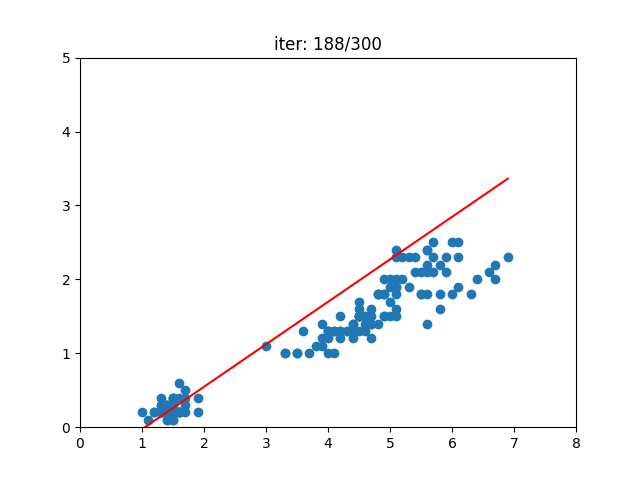

KeyboardInterrupt: 

In [2244]:
fig = plt.figure()
ax_ = fig.add_subplot(111)

for i in range(300):
    ax_.clear()
    ax_.plot([min(X_iris),max(X_iris)],[(a_b[10*i]+a_w[10*i]*min(X_iris)),(a_b[10*i]+a_w[10*i]*max(X_iris))],color='r')
    ax_.scatter(X_iris,Y_iris)
    ax_.set(xlim=(0,8),ylim=(0,5),title=f'iter: {i+1}/300')
    fig.canvas.draw()
    #time.sleep(0.5)

In [2165]:
len(a_b)

3001

<IPython.core.display.Javascript object>


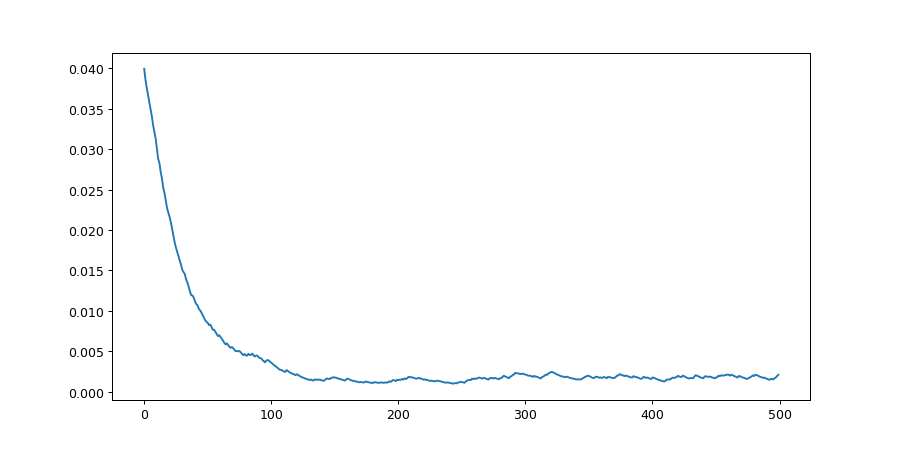

In [2204]:
iris = sns.load_dataset("iris")
X = iris['petal_length']
Y = iris['petal_width']

a_w,a_b = MGD(X,Y,0.1,20,30,1,-0.4)
f_MGD = []

fig,(ax) = plt.subplots(figsize = (10,5))
for i in range (500):
    f_MGD.append(f_L(X,Y,a_b[i],a_w[i]))
    
ax.plot(f_MGD)

# COMPARE

<font size =5>  🏠 House data

In [2213]:
df
X = df['sqft_living']
Y = df['price']

(a_b_GD, a_w_GD) = GD(X,Y,.000000001,1000,0,0)
(a_w_SGD,a_b_SGD) =  SGD(df,'sqft_living','price',0.000000001,100,3,0,0)
(a_w_MGD,a_b_MGD) = MGD(X,Y,0.000000001,15,50,0,0)

In [2168]:
len(a_w_SGD)

301

<IPython.core.display.Javascript object>


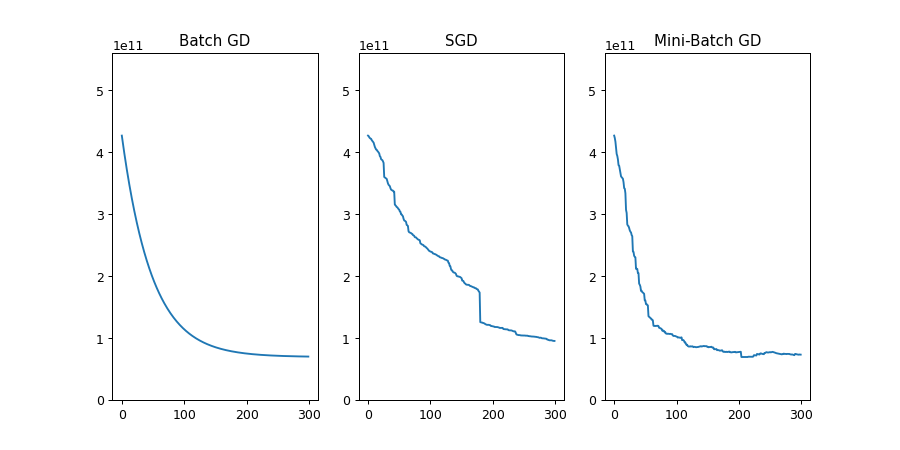

In [2214]:
f_GD = []
f_SGD = []
f_MiniB = []

fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize = (10,5))
for i in range (300):
    f_GD.append(f_L(X,Y,a_b_GD[i],a_w_GD[i]))
    f_SGD.append(f_L(X,Y,a_b_SGD[i],a_w_SGD[i]))
    f_MiniB.append(f_L(X,Y,a_b_MGD[i],a_w_MGD[i]))
ax1.plot(f_GD)
ax2.plot(f_SGD)
ax3.plot(f_MiniB)
ax1.set(ylim=(0,5.6e11),title='Batch GD')
ax2.set(ylim=(0,5.6e11),title='SGD')
ax3.set(ylim=(0,5.6e11),title='Mini-Batch GD');

<font size = 5> 🌺 Iris

In [2181]:
len(X)

150

In [2245]:
iris = sns.load_dataset("iris")
X = iris['petal_length']
Y = iris['petal_width']

(a_b_GD, a_w_GD) = GD(X,Y,.01,500,0,0)
(a_w_SGD,a_b_SGD) = SGD(iris,'petal_length','petal_width',0.01,400,5,0,0)
(a_w_MGD,a_b_MGD) = MGD(X,Y,0.01,25,30,0,0)

<IPython.core.display.Javascript object>


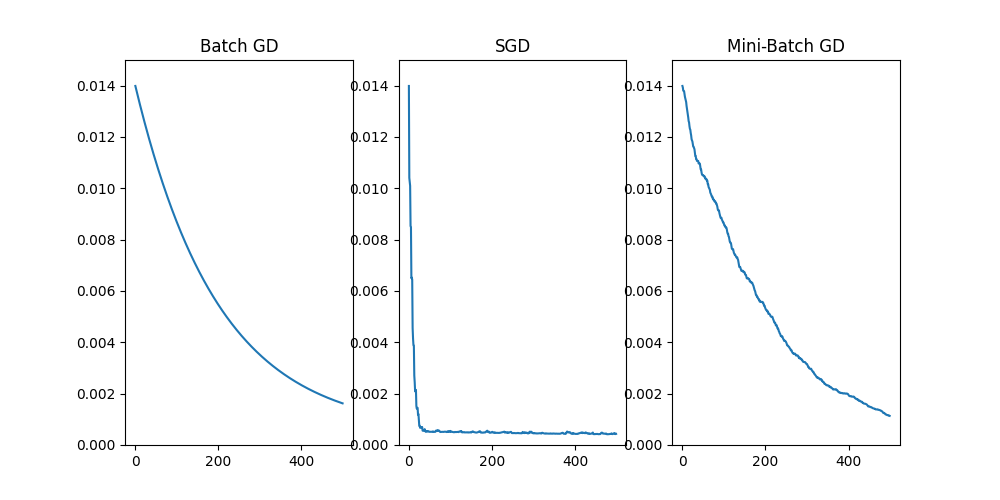

In [2246]:
f_GD = []
f_SGD = []
f_MiniB = []

fig,(ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize = (10,5))
for i in range (500):
    f_GD.append(f_L(X,Y,a_b_GD[i],a_w_GD[i]))
    f_SGD.append(f_L(X,Y,a_b_SGD[i],a_w_SGD[i]))
    f_MiniB.append(f_L(X,Y,a_b_MGD[i],a_w_MGD[i]))
ax1.plot(f_GD)
ax2.plot(f_SGD)
ax3.plot(f_MiniB)
ax1.set(ylim=(0,0.015),title='Batch GD')
ax2.set(ylim=(0,0.015),title='SGD')
ax3.set(ylim=(0,0.015),title='Mini-Batch GD');

# Emoji:

<span style="color:red">&#10060;</span> : X

👉 👇


⚠️

<span style="color: green; font-size: 24px;">&#10004;</span> : Dấu tích

&#128161; : bóng đèn

<font size =5> &#x1F9EE; Công thức 

<font size =5> &#x1F4DA; : Bài tập
   
<img src='link' style="width:500px;"/> : Chèn ảnh
    
<div style="margin-left: 200px;">: căn lề